# W51CA3 2DGaussian Fitting PBCOR

#### ALMA Band 6 (1 mm = 226 GHz) continuum
`/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits`

In [7]:
import numpy as np
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import radio_beam
from radio_beam import Beam
import numpy as np

In [9]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'

In [10]:
#Accessing Cube Data
def fit_2dgaussian(directory, maser_table,freq, amplitude, x, y, x_stddev, y_stddev, theta=np.pi/3, size=13, cube=True, table=True):

    if cube:
        cube = SpectralCube.read(directory, format='fits')
        cube = cube[0,:,:]

        cube_cutout = cube[y - size:y + size, x - size:x + size]
        yy, xx = cube_cutout.spatial_coordinate_map

        cord = cube.world[y,x]

        x_guess, y_guess = cord[1], cord[0]

    else:
        hdul = fits.open(directory3)
        hdu = hdul[0]
        header = hdu.header
        beam = Beam.from_fits_header(header) # I think this is right but you can look i tup
        data = hdu.data * u.Unit(hdu.header['BUNIT'])

        data_cutout = data[y - size:y + size, x - size:x + size]
        ypixel_grid, xpixel_grid = np.mgrid[y - size:y + size, x - size:x + size]
        xx, yy = ww.pixel_to_world_values(xpixel_grid, ypixel_grid)

        xx = (xx * u.deg)
        yy = (yy * u.deg)

        x_guess, y_guess = xx[size, size], yy[size, size]

        cube_cutout = data_cutout

        


    p_init_gauss2D = models.Gaussian2D(x_mean=x_guess, y_mean=y_guess, amplitude=amplitude * (u.Jy/u.beam),
                                    x_stddev=(x_stddev) * u.arcsec, y_stddev=(y_stddev) * u.arcsec, theta=(theta)*u.rad)

    fit_p = fitting.LevMarLSQFitter()

    cube_cutout_quant = cube_cutout

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

    p_init_gauss2D.theta.fixed = True

    cov = np.diag(fit_p.fit_info['param_cov'])
    errors = np.sqrt(cov)

    amplitude_error=np.format_float_scientific(errors[0],precision=9)
    x_mean_error=np.format_float_scientific(errors[1],precision=9)
    y_mean_error=np.format_float_scientific(errors[2],precision=9)
    x_stddev_error=np.format_float_scientific(errors[3],precision=9)
    y_stddev_error=np.format_float_scientific(errors[4],precision=9)
    theta_error=np.format_float_scientific(errors[5],precision=9)

    amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
    x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
    y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
    x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
    y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
    theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

                
    plt.figure(figsize=(20, 6))
    plt.suptitle(f"Source-CA3 freq-{freq}", fontsize=18)

    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.title("Model")
    plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.title("Residual")
    plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
    plt.colorbar(label='S (Jy)')

    plt.show()

    #saveplotfig_gaussianfit()

    # print("Parameter" + ' ' + 'Error' +"\n")
    # print(amplitude + ' ' + amplitude_error +"\n")
    # print(x_mean + ' ' + x_mean_error +"\n")
    # print(y_mean + ' ' + y_mean_error +"\n")
    # print(x_stddev + ' ' + x_stddev_error +"\n")
    # print(y_stddev + ' ' + y_stddev_error +"\n")
    # print(theta + ' ' + theta_error +"\n")
    
    if table:
        new_row = pd.DataFrame({'freq': [freq], 'x_pix': [x], 'y_pix': [y], 'amplitude': [amplitude], 'amplitude_error': [amplitude_error], 'x_mean': [x_mean], 'x_mean_error': [x_mean_error], 'y_mean': [y_mean], 'y_mean_error': [y_mean_error]})
        maser_table = pd.concat([maser_table, new_row], ignore_index=True)

        return maser_table

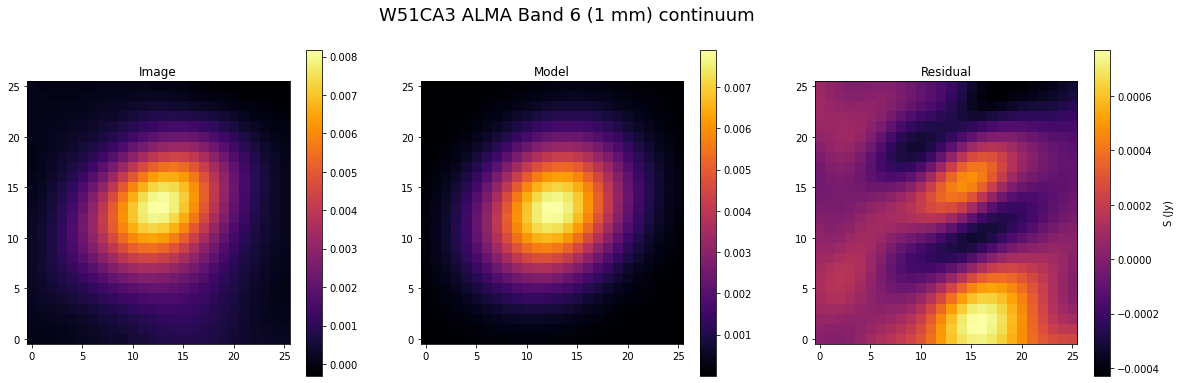

Parameter Error

7.949175317e-03 2.537724792e-04

2.90917076e+02 1.224428804e-07

1.45182376e+01 1.211903920e-07

3.577235901e-06 1.176348935e-07

4.368343544e-06 1.261432863e-07

9.1616016e-01 3.332209776e-01



In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='fits')
cube = cube[0,:,:]
x, y = 3295, 3580
size = 13

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=0.03 * (u.Jy/u.beam),
                                   x_stddev=1.111111e-5 * u.degree, y_stddev=1.111111e-5 * u.degree, theta=1.5*u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout



with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)


p_init_gauss2D.theta.fixed = True

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

              
plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 ALMA Band 6 (1 mm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

#saveplotfig_gaussianfit()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

#### ALMA Band 3 (3mm) continuum

`/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor`

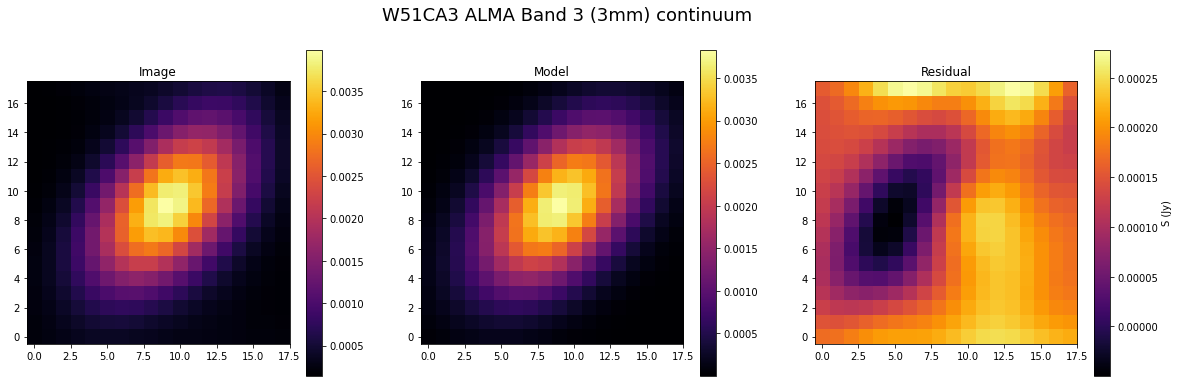

Parameter Error

3.836216067e-03 2.044091978e-04

2.909170744e+02 1.454176091e-09

1.451823444e+01 1.455523159e-09

5.279267233e-06 1.077190869e-09

8.612894463e-06 1.789961061e-09

7.852487910e-01 2.868763693e-04



In [3]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support
import pylab as pl

#Saving methods
directory1 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor'

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='casa_image')
cube = cube[0,:,:]
x, y = 7047, 7342
size = 9

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

# print("cord (cube.world[y,x])", cord, '\n')
# print("xx, yy (cube_cutout.spatial_coordinate_map)",yy, xx, '\n')

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev=(0.019) * u.arcsec, y_stddev=(0.031) * u.arcsec, theta = (np.pi/4) * u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 ALMA Band 3 (3mm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

#### VLA Q-band (0.7 cm = 46.99 GHz) continuum ICRS
`/orange/adamginsburg/w51/vla/19A-254/blue_imaging/W51_North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_selfcal4_final.image.tt0.pbcor.fits`

In [4]:
import pandas as pd

In [5]:
ca3_positions = pd.DataFrame(columns=['freq', 'x_pix', 'y_pix', 'amplitude', 'amplitude_error', 'x_mean', 'x_mean_error', 'y_mean', 'y_mean_error'])

In [6]:
fit_2dgaussian(directory3, '46.99 GHz',  7345, 7544, 0.021, 0.026, np.pi/4, 12, )

NameError: name 'directory3' is not defined

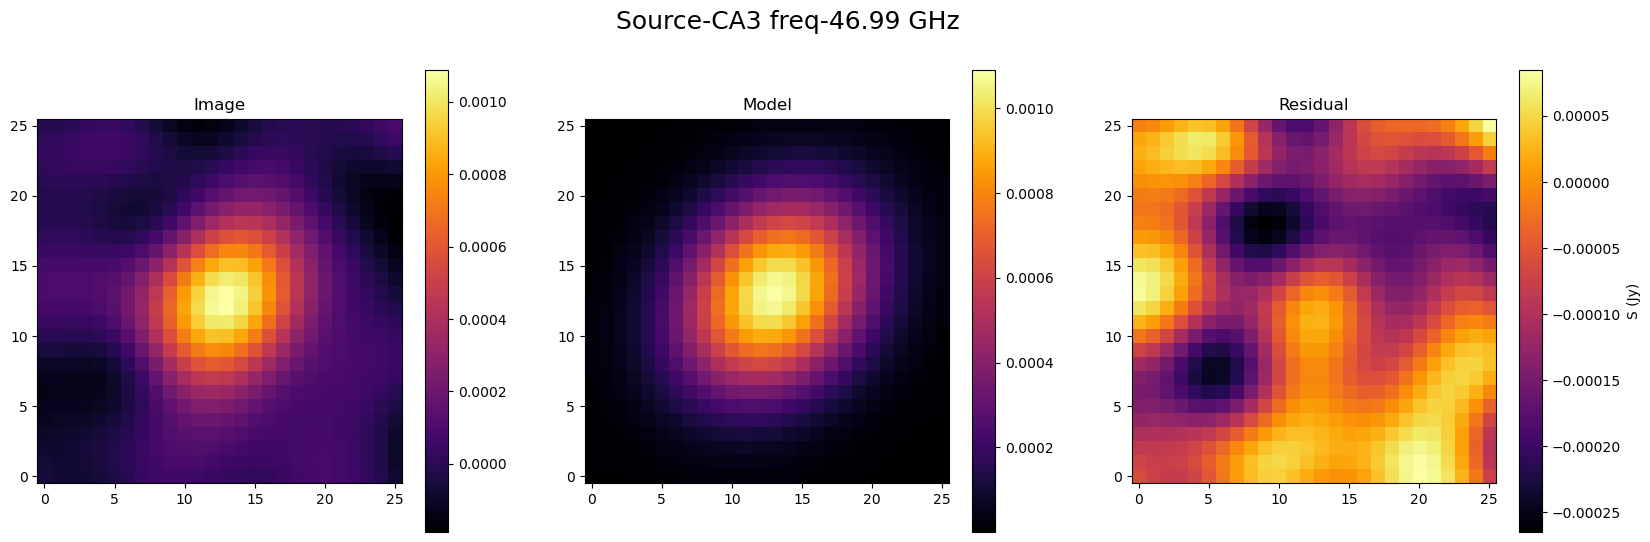

In [21]:
directory3 = '/Volumes/GalagaResearch/Developer/masers/continuum/VLA_continuum/W51_North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_selfcal4_final.image.tt0.pbcor.fits'

ca3_positions = fit_2dgaussian(table=True, cube=False, directory=directory3, 
                                          maser_table=ca3_positions,
                                          amplitude=1, x=7345, y=7544, x_stddev=0.021, y_stddev=0.026, theta=np.pi/4, 
                                          size=13, freq='46.99 GHz')

In [12]:
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import radio_beam
from radio_beam import Beam
import numpy as np

directory3 = '/orange/adamginsburg/w51/vla/19A-254/blue_imaging/W51_North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_selfcal4_final.image.tt0.pbcor.fits'

directory3 = '/Volumes/GalagaResearch/Developer/masers/continuum/VLA_continuum/W51_North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_selfcal4_final.image.tt0.pbcor.fits'

#cube = SpectralCube.read(directory3, format='fits')
#cube[0].header

hdul = fits.open(directory3)
hdu = hdul[0]
header = hdu.header
beam = Beam.from_fits_header(header) # I think this is right but you can look i tup
data = hdu.data * u.Unit(hdu.header['BUNIT'])

#plt.imshow(data, origin='lower', cmap='inferno')

In [ ]:
x, y = 7345, 7544
size = 12
data_cutout = data[y - size:y + size, x - size:x + size]
ypixel_grid, xpixel_grid = np.mgrid[y - size:y + size, x - size:x + size]
xx, yy = ww.pixel_to_world_values(xpixel_grid, ypixel_grid)

xx = (xx * u.deg)
yy = (yy * u.deg)

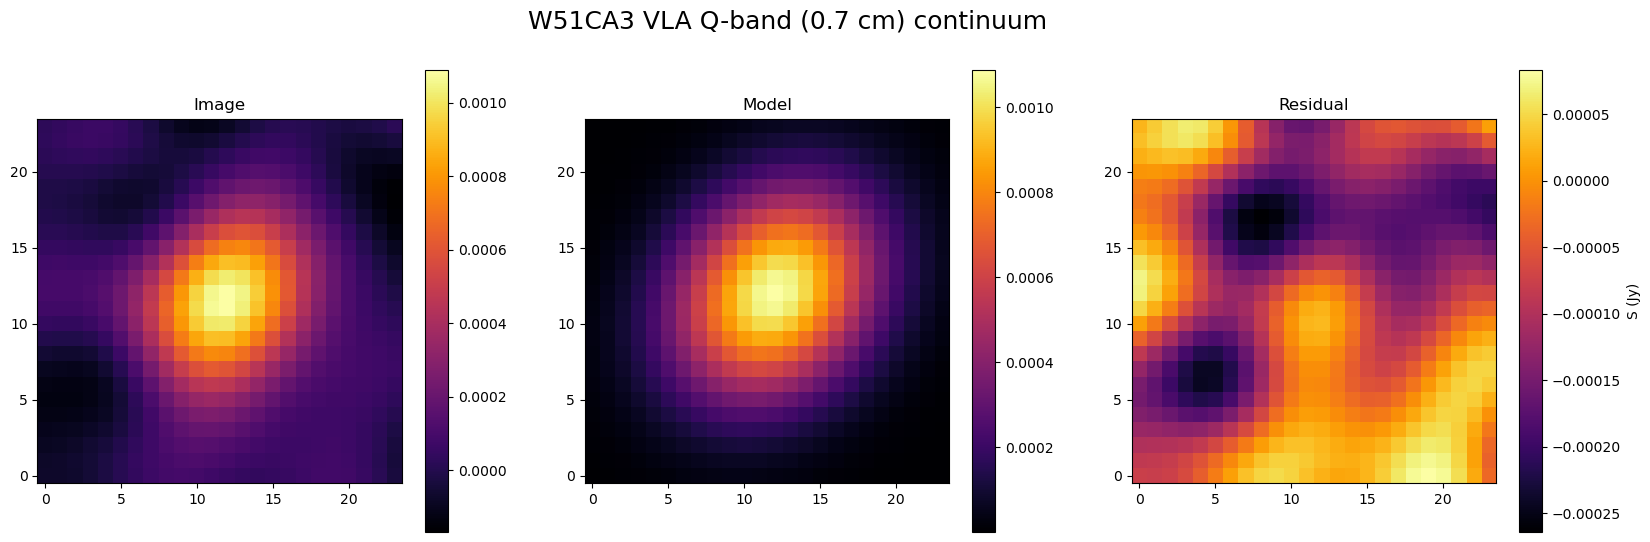

Parameter Error

1.0874127e-03 1.123486631e-04

2.909170724e+02 7.349999355e-10

1.451823333e+01 7.355606616e-10

5.832473193e-06 6.562175799e-10

7.220523623e-06 8.173703473e-10

7.851959800e-01 3.724210115e-04



In [16]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u
from astropy.wcs import WCS
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(header)

ypixel_grid, xpixel_grid = np.mgrid[y - size:y + size, x - size:x + size]
xx, yy = ww.pixel_to_world_values(xpixel_grid, ypixel_grid)

xx = (xx * u.deg)
yy = (yy * u.deg)

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev= (0.021) * u.arcsec, y_stddev=(0.026) * u.arcsec, theta = (np.pi/4) * u.rad)
#p_init_gauss2D.amplitude.fixed = True

fit_p = fitting.LevMarLSQFitter()

data_cutout_quant = data_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, data_cutout_quant)
    
cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 VLA Q-band (0.7 cm) continuum",fontsize = 18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(data_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(data_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

#### print(header)

#### VLA Ka-band ( 1 cm =  GHz) continuum ICRS
`/orange/adamginsburg/w51/vla/19A-254/derod/W51_North_KabandAarray_cont_spws_continuum_cal_clean_2terms_robust0_selfcal2.image.tt0.pbcor.fits`

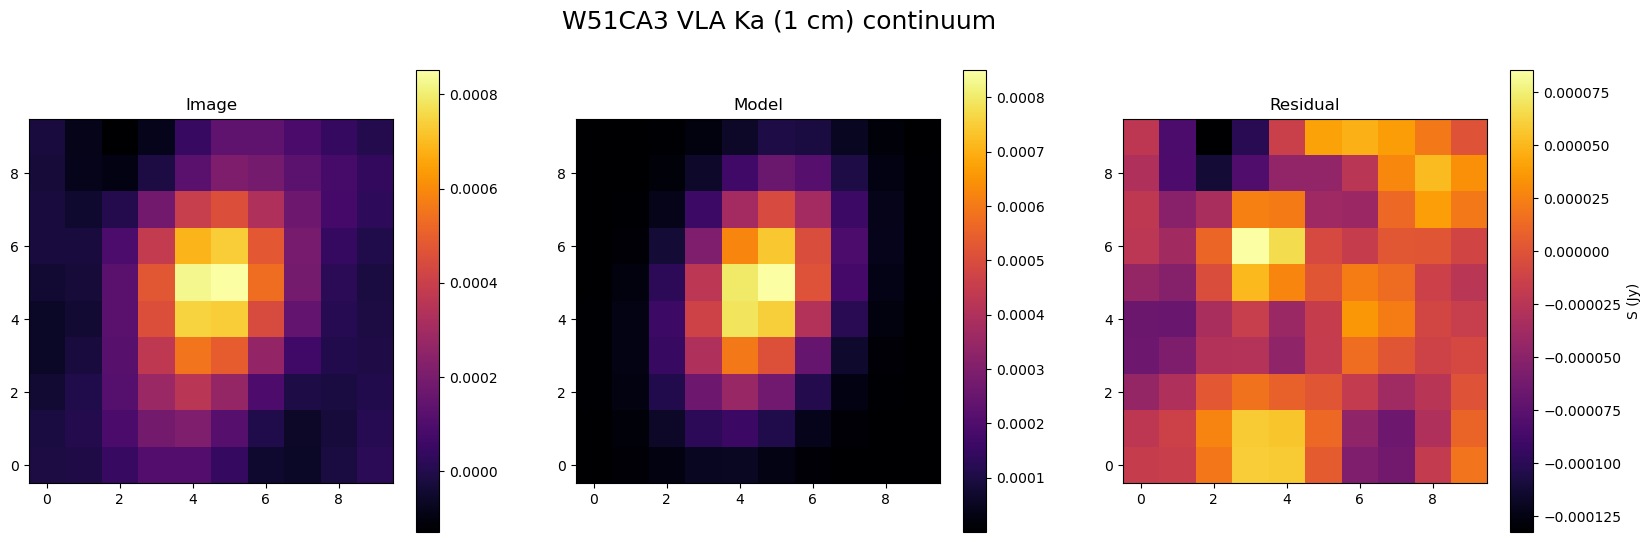

Parameter Error

8.930578327e-04 1.013525269e-04

2.909170714e+02 6.855466515e-07

1.451823383e+01 9.664812407e-07

8.777530935e-06 1.013606588e-06

5.535689575e-06 6.413065144e-07

1.908096523e+00 1.789684553e-01



In [8]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#Accessing Cube Data
cube = SpectralCube.read('/Volumes/GalagaResearch/Developer/masers/continuum/VLA_continuum/W51_North_KabandAarray_cont_spws_continuum_cal_clean_2terms_robust0_selfcal2.image.tt0.pbcor.fits', format='fits')
cube = cube[0,:,:]
x, y = 4949, 5015
size = 5

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=0.03 * (u.Jy/u.beam),
                                   x_stddev=1.111111e-5 * u.degree, y_stddev=1.111111e-5 * u.degree, theta=1.5*u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout



with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)


p_init_gauss2D.theta.fixed = True

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

              
plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 VLA Ka (1 cm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

#saveplotfig_gaussianfit()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

In [7]:
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import radio_beam
from radio_beam import Beam
import numpy as np

directory3 = '/orange/adamginsburg/w51/vla/19A-254/derod/W51_North_KabandAarray_cont_spws_continuum_cal_clean_2terms_robust0_selfcal2.image.tt0.pbcor.fits'

#cube = SpectralCube.read(directory3, format='fits')
#cube[0].header

hdul = fits.open(directory3)
hdu = hdul[0]
header = hdu.header
beam = Beam.from_fits_header(header) # I think this is right but you can look i tup
data = hdu.data * u.Unit(hdu.header['BUNIT'])
#plt.imshow(data, origin='lower', cmap='inferno')

IsADirectoryError: [Errno 21] Is a directory: '/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor'

<Quantity [[[nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            ...,
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan]]] Jy / beam>

TypeError: Invalid shape (0, 14, 10000) for image data

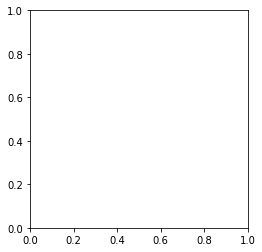

In [11]:
x, y = 4949, 5015
size = 7
data_cutout = data[y - size:y + size, x - size:x + size]

In [9]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u
from astropy.wcs import WCS
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(header)

ypixel_grid, xpixel_grid = np.mgrid[y - size:y + size, x - size:x + size]
xx, yy = ww.pixel_to_world_values(xpixel_grid, ypixel_grid)

xx = (xx * u.deg)
yy = (yy * u.deg)

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev= (0.021) * u.arcsec, y_stddev=(0.026) * u.arcsec, theta = (np.pi/4) * u.rad)
#p_init_gauss2D.amplitude.fixed = True

fit_p = fitting.LevMarLSQFitter()

data_cutout_quant = data_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, data_cutout_quant)
    
cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 VLA Q-band (0.7 cm) continuum",fontsize = 18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(data_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(data_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

TypeError: WCS projection has 4 dimensions, so expected 2 (an Nx4 array and the origin argument) or 5 arguments (the position in each dimension, and the origin argument). Instead, 3 arguments were given.

In [4]:
header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                10000                                                  
NAXIS2  =                10000                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.411030172474E-05                                                  
BMIN    =   1.317552187377E-05                                                  
BPA     =   3.874738311768E+

switch the Q-band data you're using to /orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_incrementalselfcal10.image.tt0.pbcor.fits

In [3]:
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import radio_beam
from radio_beam import Beam
import numpy as np

directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_incrementalselfcal10.image.tt0.pbcor.fits'

#cube = SpectralCube.read(directory3, format='fits')
#cube[0].header

hdul = fits.open(directory3)
hdu = hdul[0]
header = hdu.header
beam = Beam.from_fits_header(header) # I think this is right but you can look i tup
data = hdu.data * u.Unit(hdu.header['BUNIT'])

#plt.imshow(data, origin='lower', cmap='inferno')
header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    2                                                  
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.280000122885E-05                                                  
BMIN    =   9.402085302605E-06                                                  
BPA     =  -6.654223632812E+01                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = '        '        

In [4]:
x, y = 310, 408
size = 10

data_cutout = data[y - size:y + size, x - size:x + size]

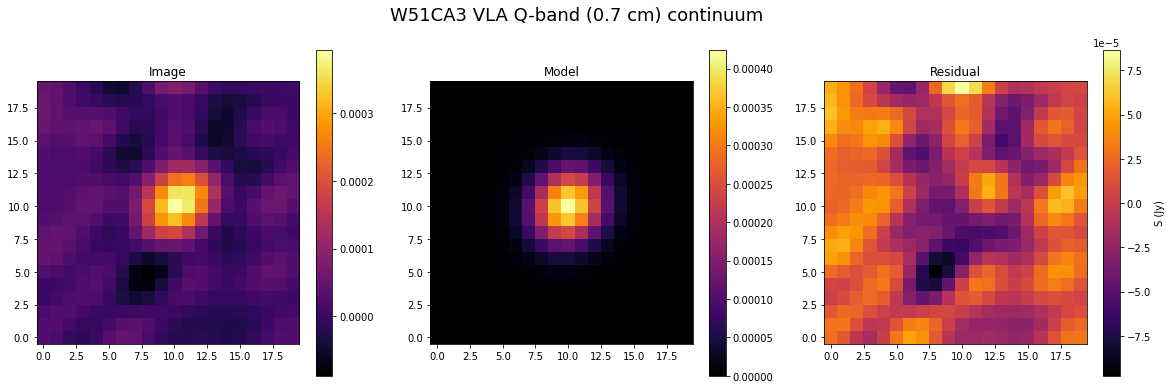

Parameter Error

4.248654727e-04 6.997815934e-05

2.909170754e+02 1.849201783e-08

1.45182353e+01 1.849201783e-08

4.984126741e-06 1.749453983e-08

5.54831977e-06 1.943837758e-08

7.938623025e-01 2.343885679e-02



In [7]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u
from astropy.wcs import WCS
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(header)

ypixel_grid, xpixel_grid = np.mgrid[y - size:y + size, x - size:x + size]
xx, yy = ww.pixel_to_world_values(xpixel_grid, ypixel_grid)

xx = (xx * u.deg)
yy = (yy * u.deg)

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=0.02 * (u.Jy/u.beam),
                                   x_stddev= (0.018) * u.arcsec, y_stddev=(0.020) * u.arcsec, theta = (np.pi/4) * u.rad)
#p_init_gauss2D.amplitude.fixed = True

fit_p = fitting.LevMarLSQFitter()

data_cutout_quant = data_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, data_cutout_quant)
    
cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 VLA Q-band (0.7 cm) continuum",fontsize = 18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(data_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(data_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

## FK5 ICRS Conversion

In [7]:
from astropy import coordinates, units as u

coordinates.SkyCoord('19:23:45.05','17:30:30', unit=(u.hour, u.deg), frame='fk5').fk5

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (290.93770833, 17.50833333)>

In [8]:
from astropy import coordinates, units as u

coordinates.SkyCoord('19:23:45.05','17:30:30', unit=(u.hour, u.deg), frame='fk5').icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (290.93770209, 17.50832727)>

#### Finding the Coordinate System for Each FITS

In [9]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'
directory2 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0'

ALMA_Band_6_cube = SpectralCube.read(directory1, format='casa_image')
ALMA_Band_3_cube = SpectralCube.read(directory2, format='casa_image')
VLA_QBand_cube   = SpectralCube.read(directory3, format='casa_image')

NotADirectoryError: [Errno 20] Not a directory: '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits/table.f0'

In [20]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'
cube = SpectralCube.read(directory1, format='fits')
cube1 = cube[0,:,:]

directory2 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor'
cube = SpectralCube.read(directory2, format='casa_image')
cube2 = cube[0,:,:]

directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0.pbcor.fits'
hdul = fits.open(directory3)
hdu = hdul[0]
header = hdu.header
beam = Beam.from_fits_header(header) # I think this is right but you can look i tup
data = hdu.data * u.Unit(hdu.header['BUNIT'])

In [60]:
x, y = 3295, 3580
size = 100

cube_cutout1 = cube1[y - size:y + size, x - size:x + size]

In [61]:
x, y = 7047, 7342
size = 50

cube_cutout2 = cube2[y - size:y + size, x - size:x + size]

In [64]:
x, y = 3922, 4023
size = 50

data_cutout = data[y - size:y + size, x - size:x + size]

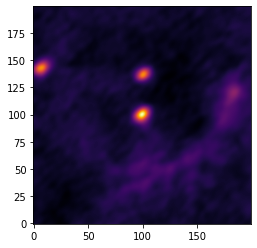

In [65]:
plt.imshow(cube_cutout1.value, origin='lower', cmap='inferno')

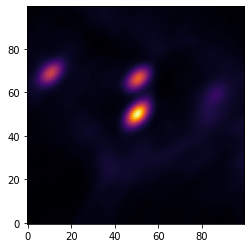

In [66]:
plt.imshow(cube_cutout2.value, origin='lower', cmap='inferno')

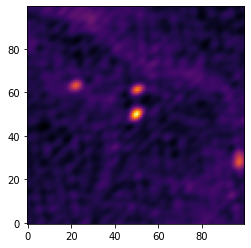

In [67]:
plt.imshow(data_cutout.value, origin='lower', cmap='inferno')

In [ ]:
plt.imshow(cube_cutout2.value, origin='lower', cmap='inferno')